<h1 style="text-align: center;">Trump vs Biden 2020 Presidential Campaign Twitter Sentiment</h1>

## Introduction

One of the hottest topics in 2020 was the presidential election between Donald J. Trump and former vice president Joe Biden. This election was full of firsts; It was the first election held during a worldwide pandemic, the first election to have 3 states whose margin of victory was under 1%, and the first incumbent president not to concede. Because of the election's uniqueness and the highly contrasting personalities between the candidates, I decided to analyze the sentiment of each candidate’s tweets to find out how much their social media attitude affected their twitter impressions and their general approval.<br>


In the analysis, we mapped the candidate's sentiment in a `time series` as well as measured how popular their most liked and dislike tweets were through retweets and likes. We wanted to see if there was a correlation between negative or positive sentiment and popularity for each candidate.

We got the motivation for this topic from an article published by Cambridge University Press titled: “Differences in negativity bias underlie variations in political ideology”.  This article discusses how negative thoughts gain more attention and popularity than positive thoughts do.  Negative thoughts also stay within our memory for a longer period.  This also links to negative bias in politics, which triggered an idea to apply sentiment analysis in politics. The 2020 presidential election was the perfect area to focus this analysis on negative political bias.
    

Note, get general approval data

April 25, 2019, Biden

Links:

https://www.scientificamerican.com/article/the-neuroscience-of-everybody-favorite-topic-themselves/

https://www.kaggle.com/rohanrao/joe-biden-tweets

https://www.kaggle.com/markhhuang/complete-trump-tweets

https://www.kaggle.com/amineabouothmane/biden-vs-trump-sentiment-analysis-of-tweets

https://www.kaggle.com/ahmedterry/trump-tweets-eda-nlp-sentiments-analysis

https://www.kaggle.com/thomaskonstantin/trump-s-insults-time-based-sentiment-analysis

## Import Resources

### Libraries

In [480]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from textblob import TextBlob
import re
nltk.downloader.download('vader_lexicon')
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lalin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Data

In [ ]:
trumpOld = pd.read_csv(".")

In [3]:
# dont run these 
# AccessToken = '1325166553-AaLqrAHSEzFQg0KOQPrfL5B46EiOuvw3bWV7FUb'
# AccessTokenSecret = 'ahA6V1c7wQoByveazFsq1dcf2YrqccUqbmlPuWCNUJ8Yo'
# API_key = 'BtsZY4DuRx6D6WuYRmyRKc5gr'
# API_key_secret = 'hcqxqk31EzMpKMcRvNdQKDzpGVmsShVlfpX3k1vDXR6zzbIwuJ'

# auth = tweepy.OAuthHandler(API_key,API_key_secret)
# auth.set_access_token(AccessToken, AccessTokenSecret)
# api = tweepy.API(auth)

# user = api.me()
# print(user.name)

In [4]:
#tweets = []

#for page in range(1,10):
#   tweets.extend(api.user_timeline(screen_name = "realDonaldTrump", count=200, page=page))
    
#print("Number of tweets extracted: {}.".format(len(tweets)))


## Proof of Concept Work for Trump Twitter Analysis for Small Dataset of 1785 tweets

In [6]:
#with open('trump_tweets.pkl', 'wb') as f:
#    pickle.dump(tweets, f)

## Read Data

In [481]:
file = open('trump_tweets.pkl','rb')
tweets = pickle.load(file)
for tweet in tweets[:5]:
    print(tweet.text)
    

THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!
Undecided Voters at Concast Town Hall Previously Told Network They Were Voting Biden...https://t.co/NDaiFaxmmU
RT @LawEnforceToday: We've never before formally endorsed a candidate.  Today, that changes.  Law Enforcement Today proudly endorses Donald…
NOW THAT THE RADICAL LEFT DEMOCRATS GOT CAUGHT COLD IN THE (NON) FRIENDLY TRANSFER OF GOVERNMENT, IN FACT, THEY SPI… https://t.co/xIzvcHZYI6
She is far further left than Crazy Bernie. Biden would not last a month! https://t.co/kJWITxYRV1


In [482]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]



In [483]:
own_tweets[0].created_at

datetime.datetime(2020, 10, 7, 15, 25, 38)

In [484]:
own_tweets[0].text

'THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!'

In [485]:
own_tweets[0].favorite_count

108262

## Make DataFrame

In [486]:
df = pd.DataFrame(data = [[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets],
                 columns= ['date','tweet', 'tweet_length', 'id', 'likes', 'retweets'])

In [487]:
df.head()

,date,tweet,tweet_length,id,likes,retweets
0,2020-10-07 15:25:38,THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!,49,1313863059019051009,108262,24790
1,2020-10-07 15:20:03,Undecided Voters at Concast Town Hall Previous...,110,1313861656766820352,23402,7872
2,2020-10-07 14:51:29,NOW THAT THE RADICAL LEFT DEMOCRATS GOT CAUGHT...,140,1313854465276080128,59299,18392
3,2020-10-07 14:33:40,She is far further left than Crazy Bernie. Bid...,96,1313849980906614785,36196,10290
4,2020-10-07 14:26:43,"Ari, THE MEDIA IS CORRUPT, JUST LIKE OUR DEMOC...",140,1313848232716521473,35715,11741


In [488]:
 df.tail()

,date,tweet,tweet_length,id,likes,retweets
941,2020-08-27 23:54:20,Democrats Hate that I called for Big Pharma to...,140,1299133174564491265,164854,35347
942,2020-08-27 23:18:41,Democrats and Biden didn’t even mention the An...,140,1299124203552210951,125146,30987
943,2020-08-27 23:07:39,The Ten Most Dangerous Cities in the U.S. are ...,101,1299121427879276544,286172,66380
944,2020-08-27 19:44:59,https://t.co/AWC0HLAgJD,23,1299070423838138369,51897,11972
945,2020-08-27 03:27:34,https://t.co/Bk68pgSU5D,23,1298824449966452737,56915,12295


In [489]:
df[df['likes']==df['likes'].max()]

,date,tweet,tweet_length,id,likes,retweets
99,2020-10-02 04:54:06,"Tonight, @FLOTUS and I tested positive for COV...",140,1311892190680014849,1885685,415997


In [490]:
df['likes'].describe()

count    9.460000e+02
mean     9.712559e+04
std      1.094656e+05
min      0.000000e+00
25%      4.154775e+04
50%      6.645550e+04
75%      1.174175e+05
max      1.885685e+06
Name: likes, dtype: float64

## Test TextBlob

In [491]:
a = TextBlob("Wear your mask")
a.sentiment.polarity

0.0

## Add Sentiment and Subjectivity Columns

Adds sentiment and subjectivity

Sentiment is how positive or negative a sentence is

Sujectivity is how much of an opinion or fact a sentence is (0 is opinion, 1 is fact)

In [492]:
df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df['subjectivity'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
df['date'] = pd.to_datetime(df['date']).dt.date
print(df.shape)
df.head()


(946, 8)


,date,tweet,tweet_length,id,likes,retweets,sentiment,subjectivity
0,2020-10-07,THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!,49,1313863059019051009,108262,24790,-0.125000,0.650000
1,2020-10-07,Undecided Voters at Concast Town Hall Previous...,110,1313861656766820352,23402,7872,-0.166667,0.166667
2,2020-10-07,NOW THAT THE RADICAL LEFT DEMOCRATS GOT CAUGHT...,140,1313854465276080128,59299,18392,-0.075000,0.500000
3,2020-10-07,She is far further left than Crazy Bernie. Bid...,96,1313849980906614785,36196,10290,-0.100000,0.493333
4,2020-10-07,"Ari, THE MEDIA IS CORRUPT, JUST LIKE OUR DEMOC...",140,1313848232716521473,35715,11741,-0.562500,1.000000


## Remove Retweet Links

We use regex to remove any links embedded on Trump's tweets, as some tweets are just a link or retweet of someone else, leading to useless data that skews our calculations, or messes with the NLP functions

In [493]:
#Test regex
#re.sub('(https.+[ ])|(https.+)', '', "HELLO https://t.co/AWC0HLAgJD HELLO")

In [494]:
df['tweet'] = df['tweet'].apply(lambda tweet: re.sub('(https.+[ ])|(https.+)', '', tweet))

In [495]:
df = df[df['tweet'] != ""]

In [496]:
print(df.shape)
df.head()

(761, 8)


,date,tweet,tweet_length,id,likes,retweets,sentiment,subjectivity
0,2020-10-07,THE FAKE NEWS MEDIA IS THE REAL OPPOSITION PARTY!,49,1313863059019051009,108262,24790,-0.125000,0.650000
1,2020-10-07,Undecided Voters at Concast Town Hall Previous...,110,1313861656766820352,23402,7872,-0.166667,0.166667
2,2020-10-07,NOW THAT THE RADICAL LEFT DEMOCRATS GOT CAUGHT...,140,1313854465276080128,59299,18392,-0.075000,0.500000
3,2020-10-07,She is far further left than Crazy Bernie. Bid...,96,1313849980906614785,36196,10290,-0.100000,0.493333
4,2020-10-07,"Ari, THE MEDIA IS CORRUPT, JUST LIKE OUR DEMOC...",140,1313848232716521473,35715,11741,-0.562500,1.000000


## Get only most Popular and Least Subjective Tweets

Since we only care about determining popularity based on sentiment, we'll only use the 75th percentile of tweets based on likes. Since Trump likes talking about himself and patting himself on the back, we'll only use tweets with a subjectivity level of 70% or below, as we believe that tweets were he is highly focusing on his personal opinion of himself should be neutral rather than a "positive" or "negative" tweet, but are skewed as being positive with the NLP library we're using.

In [509]:
dfMostLiked = df[df['likes'] >=np.percentile(df.likes, 75)]
dfMostLiked = dfMostLiked[dfMostLiked['subjectivity'] <= 0.7]
print(dfMostLiked.shape)
dfMostLiked.head()

(148, 8)


,date,tweet,tweet_length,id,likes,retweets,sentiment,subjectivity
25,2020-10-07,"11,00 North Carolina residents get incorrect v...",140,1313661368856457217,143351,42939,0.000000,0.000000
26,2020-10-07,The House &amp; Senate should IMMEDIATELY Appr...,148,1313658825040371712,160376,43322,0.000000,0.000000
27,2020-10-07,"Wear your mask in the “beauty” parlor, Nancy!",69,1313654133153583104,193541,41866,0.000000,0.000000
31,2020-10-07,All Russia Hoax Scandal information was Declas...,140,1313650640699224069,145965,41914,-0.275000,0.700000
38,2020-10-07,I have fully authorized the total Declassifica...,144,1313640512025513984,218458,80849,0.309524,0.654762


Since each tweet has an equal weight when determining the days's sentiment polarity, we will round all negative polarity tweets to -1 and all positive polarity tweets to 1, then take the average per day to determine how a day's sentiment is calucalted

Text(0.5, 1.0, 'Daily Average Sentiment')

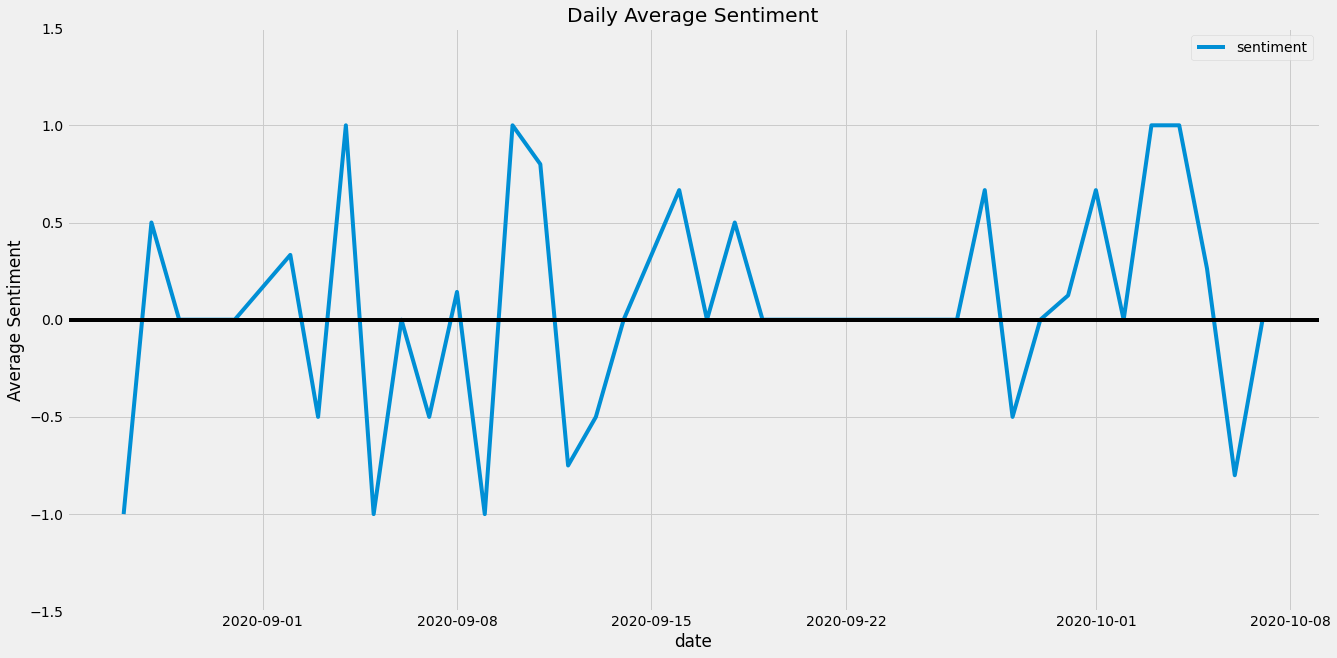

In [510]:
df_date = dfMostLiked.copy()
df_date.loc[df_date['sentiment'] < 0, 'sentiment'] = -1
df_date.loc[df_date['sentiment'] > 0, 'sentiment'] = 1
df_date_counts = df_date.groupby(['date']).mean().reset_index()
df_date_counts.plot(kind= 'line', x ='date', y = 'sentiment', figsize = (20,10), ylim = (-1.5,1.5))
plt.axhline(y=0, color = 'black')
plt.ylabel('Average Sentiment')
plt.title('Daily Average Sentiment')

In [511]:
df_date = dfMostLiked.copy()
df_date.loc[df_date['sentiment'] < 0, 'sentiment'] = -1
df_date.loc[df_date['sentiment'] > 0, 'sentiment'] = 1
df_date['sentiment'].sum()

16.0